In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing_functions 
import warnings
warnings.filterwarnings("ignore")
import pycaret
from pycaret.classification import *

# Fitbit

In [2]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)

fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,46.44026,8567.1,81.644017,227.0,8.0,3.0,729.0,NaN,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2147.17,49.73933,5337.8,104.619583,61.0,3.0,43.0,1333.0,NaN,72.436947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7279.0,32.0,236.0,30.0,0.0,1.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,0.800000,-2.055332,1723.61,45.23770,5028.5,77.061042,272.0,8.0,2.0,723.0,NaN,68.243822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7493.0,127.0,1306.0,7.0,0.0,1.0,1.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,0.633333,-0.720949,2393.99,43.67853,2444.9,94.808800,143.0,0.0,0.0,796.0,NaN,85.806939,30060000.0,0.0,438.0,63.0,19.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,701.0,735.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1339.20,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252.80,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.469242,2150.69,44.99934,3079.0,NaN,176.0,4.0,5.0,579.0,NaN,63.885053,19320000.0,0.0,272.0,50.0,0.0,96.0,1.050000,0.961538,0.974093,0.381818,4278.0,NaN,NaN,NaN,NaN,1.0,0.0,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,-2.346201,1864.23,60.17697,2233.9,63.148837,157.0,0.0,0.0,706.0,NaN,58.144251,29940000.0,0.0,421.0,78.0,0.0,94.0,0.701754,1.368421,1.103806,0.849315,3122.0,2.0,1348.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# TTM

In [3]:
ttm = pd.read_pickle('data/surveys/ttm_classification.pkl')
ttm

,id,date,stage
0,621e314867b776a24029ebf9,2021-05-31,Preparation
1,621e36c267b776a240ba2756,2021-05-31,Action
2,621e328667b776a240281372,2021-05-31,Maintenance
3,621e2f3967b776a240c654db,2021-05-31,Preparation
4,621e32d967b776a240627414,2021-05-31,Maintenance
5,621e34ec67b776a240d60873,2021-06-02,Maintenance
6,621e332267b776a24092a584,2021-06-02,Maintenance
7,621e326767b776a24012e179,2021-06-07,Maintenance
8,621e375b67b776a240290cdc,2021-06-08,Action
9,621e34db67b776a240c9c2be,2021-06-09,Preparation


In [4]:
ttm['stage'].value_counts()

Maintenance         16
Contemplation       14
Action              10
Preparation          8
Precontemplation     5
Name: stage, dtype: int64

<AxesSubplot: xlabel='count', ylabel='stage'>

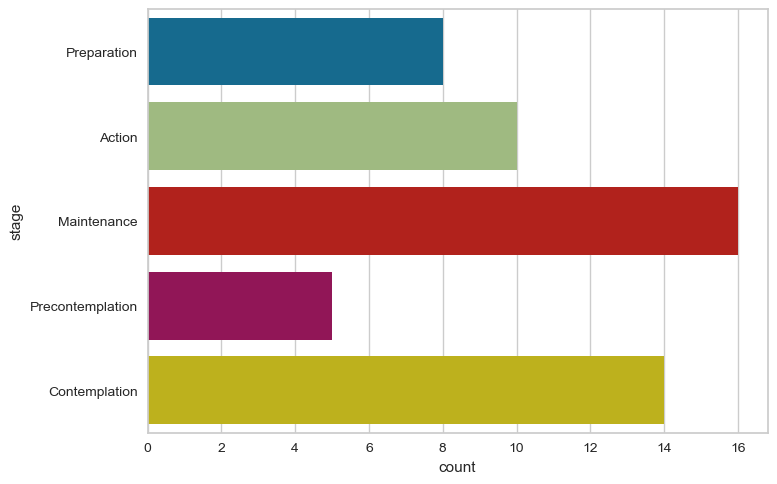

In [5]:
sns.countplot(y="stage", data=ttm)

In [6]:
ttm['stage'].replace(to_replace=['Preparation', 'Action', 'Maintenance', 'Precontemplation', 'Contemplation'], value=[0, 1, 2, 3, 4], inplace=True)

In [7]:
data = pd.merge(fitbit, ttm, on=['date','id'], how='inner')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,stage
0,621e2f3967b776a240c654db,2021-05-31,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,2034.95,49.36558,3880.2,81.079290,82.0,24.0,11.0,768.0,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,1.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,621e328667b776a240281372,2021-05-31,33.658822,63.698,33.857,NaN,14.8,88.0,0.766667,1.000,0.833333,-1.383988,2880.37,41.16504,4485.9,88.398582,204.0,18.0,20.0,741.0,NaN,69.478404,27420000.0,0.0,401.0,56.0,4.0,92.0,0.943662,0.949153,0.815385,1.284211,6314.0,223.0,843.0,112.0,20.0,1.0,0.0,3,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,621e314867b776a24029ebf9,2021-05-31,33.876789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.522155,2116.55,55.41570,1230.1,55.107721,94.0,0.0,0.0,858.0,NaN,46.721067,29280000.0,0.0,406.0,82.0,0.0,92.0,1.028169,1.223881,0.957265,1.112245,1671.0,0.0,1383.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,621e36c267b776a240ba2756,2021-05-31,33.094862,NaN,NaN,NaN,NaN,80.0,0.766667,0.750,0.900000,-0.248201,3564.29,53.42927,10209.0,81.537429,345.0,43.0,21.0,512.0,NaN,63.858006,31140000.0,0.0,460.0,59.0,0.0,96.0,1.205479,1.282609,1.290909,0.926316,12834.0,272.0,1165.0,3.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,621e32d967b776a240627414,2021-05-31,31.921658,NaN,NaN,96.9,16.6,0.0,0.000000,0.000,0.000000,NaN,4379.75,30.14678,10799.2,80.184749,283.0,32.0,38.0,686.0,NaN,72.648504,24060000.0,0.0,365.0,36.0,10.0,98.0,1.047059,0.705882,0.758929,1.177778,14556.0,170.0,1245.0,0.0,0.0,1.0,0.0,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
5,621e34ec67b776a240d60873,2021-06-02,33.665914,59.522,29.807,95.4,18.2,75.0,0.533333,0.900,0.766667,-1.841256,3083.26,50.45732,9876.4,82.635101,301.0,28.0,40.0,689.0,NaN,65.143556,22920000.0,0.0,331.0,51.0,0.0,90.0,0.459016,1.000000,1.141026,0.562500,14032.0,172.0,1268.0,0.0,0.0,0.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
6,621e332267b776a24092a584,2021-06-02,34.227983,61.453,0.000,96.2,17.8,0.0,0.000000,0.000,0.000000,-1.340314,3720.45,53.23748,21284.1,78.670197,171.0,108.0,115.0,524.0,NaN,63.833432,31320000.0,0.0,442.0,80.0,1.0,94.0,0.835052,1.025641,0.860841,0.798319,26813.0,136.0,1196.0,0.0,0.0,0.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
7,621e326767b776a24012e179,2021-06-07,34.613634,48.799,10.460,96.5,15.0,75.0,0.633333,0.825,0.766667,-2.464592,2350.05,51.66638,14993.8,73.728384,299.0,91.0,44.0,539.0,NaN,55.872747,28020000.0,0.0,396.0,71.0,0.0,94.0,1.208333,1.339623,1.392523,0.645161,22631.0,116.0,1219.0,2.0,0.0,0.0,1.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
8,621e375b67b776a240290cdc,2021-06-08,34.464015,67.679,18.803,NaN,16.4,84.0,0.833333,0.950,0.700000,-1.075844,2355.14,36.23140,10749.8,85.475744,168.0,69.0,78.0,424.0,NaN,75.151735,36780000.0,0.0,534.0,79.0,2.0,96.0,1.000000,1.274194,1.333333,1.494624,16285.0,366.0,1059.0,14.0,0.0,0.0,1.0,1,0,1,1.0,0.

In [8]:
data = preprocessing_functions.date_engineering(data)
data

,id,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,stage,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2f3967b776a240c654db,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,2034.95,49.36558,3880.2,81.079290,82.0,24.0,11.0,768.0,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,1.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-8.660254e-01,0.000000e+00,-8.660254e-01,0.587785,0.5,1.000000,-0.5,0.809017
1,621e328667b776a240281372,33.658822,63.698,33.857,NaN,14.8,88.0,0.766667,1.000,0.833333,-1.383988,2880.37,41.16504,4485.9,88.398582,204.0,18.0,20.0,741.0,NaN,69.478404,27420000.0,0.0,401.0,56.0,4.0,92.0,0.943662,0.949153,0.815385,1.284211,6314.0,223.0,843.0,112.0,20.0,1.0,0.0,3,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,-8.660254e-01,0.000000e+00,-8.660254e-01,0.587785,0.5,1.000000,-0.5,0.809017
2,621e314867b776a24029ebf9,33.876789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.522155,2116.55,55.41570,1230.1,55.107721,94.0,0.0,0.0,858.0,NaN,46.721067,29280000.0,0.0,406.0,82.0,0.0,92.0,1.028169,1.223881,0.957265,1.112245,1671.0,0.0,1383.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-8.660254e-01,0.000000e+00,-8.660254e-01,0.587785,0.5,1.000000,-0.5,0.809017
3,621e36c267b776a240ba2756,33.094862,NaN,NaN,NaN,NaN,80.0,0.766667,0.750,0.900000,-0.248201,3564.29,53.42927,10209.0,81.537429,345.0,43.0,21.0,512.0,NaN,63.858006,31140000.0,0.0,460.0,59.0,0.0,96.0,1.205479,1.282609,1.290909,0.926316,12834.0,272.0,1165.0,3.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-8.660254e-01,0.000000e+00,-8.660254e-01,0.587785,0.5,1.000000,-0.5,0.809017
4,621e32d967b776a240627414,31.921658,NaN,NaN,96.9,16.6,0.0,0.000000,0.000,0.000000,NaN,4379.75,30.14678,10799.2,80.184749,283.0,32.0,38.0,686.0,NaN,72.648504,24060000.0,0.0,365.0,36.0,10.0,98.0,1.047059,0.705882,0.758929,1.177778,14556.0,170.0,1245.0,0.0,0.0,1.0,0.0,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,-8.660254e-01,0.000000e+00,-8.660254e-01,0.587785,0.5,1.000000,-0.5,0.809017
5,621e34ec67b776a240d60873,33.665914,59.522,29.807,95.4,18.2,75.0,0.533333,0.900,0.766667,-1.841256,3083.26,50.45732,9876.4,82.635101,301.0,28.0,40.0,689.0,NaN,65.143556,22920000.0,0.0,331.0,51.0,0.0,90.0,0.459016,1.000000,1.141026,0.562500,14032.0,172.0,1268.0,0.0,0.0,0.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,-2.449294e-16,5.877853e-01,-8.660254e-01,0.951057,1.0,-0.809017,-0.5,0.309017
6,621e332267b776a24092a584,34.227983,61.453,0.000,96.2,17.8,0.0,0.000000,0.000,0.000000,-1.340314,3720.45,53.23748,21284.1,78.670197,171.0,108.0,115.0,524.0,NaN,63.833432,31320000.0,0.0,442.0,80.0,1.0,94.0,0.835052,1.025641,0.860841,0.798319,26813.0,136.0,1196.0,0.0,0.0,0.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,-2.449294e-16,5.877853e-01,-8.660254e-01,0.951057,1.0,-0.809017,-0.5,0.309017
7,621e326767b776a24012e179,34.613634,48.799,10.460,96.5,15.0,75.0,0.633333,0.825,0.766667,-2.464592,2350.05,51.66638,14993.8,73.728

In [9]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [10]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(25, 66)"
5,Missing Values,True
6,Numeric Features,29
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3657,0.3774,0.3278,0.3017,0.2909,0.1391,0.1992,0.5567
lightgbm,Light Gradient Boosting Machine,0.3565,0.3333,0.2444,0.1336,0.1927,0.0000,0.0000,0.1900
dummy,Dummy Classifier,0.3565,0.3333,0.2444,0.1336,0.1927,0.0000,0.0000,0.0033
nb,Naive Bayes,0.3148,0.3690,0.2583,0.1978,0.2222,0.0971,0.1151,0.5400
rf,Random Forest Classifier,0.3102,0.3938,0.2870,0.2824,0.2518,0.0574,0.0301,0.0633
et,Extra Trees Classifier,0.2454,0.4280,0.2319,0.1898,0.2037,0.0290,0.0138,0.0533
ridge,Ridge Classifier,0.2315,0.0000,0.1944,0.2220,0.2147,-0.0282,-0.0240,0.0067
lda,Linear Discriminant Analysis,0.1991,0.3772,0.1736,0.1165,0.1345,-0.0714,-0.0904,0.0100
lr,Logistic Regression,0.1620,0.3534,0.0944,0.1091,0.1194,-0.0794,-0.1061,0.9833
ada,Ada Boost Classifier,0.1620,0.2176,0.1097,0.1262,0.1184,-0.1360,-0.1530,0.0267


In [12]:
data = preprocessing_functions.post_preprocessing(data)

In [13]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [14]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(25, 64)"
5,Missing Values,False
6,Numeric Features,55
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.4722,0.0000,0.3926,0.5237,0.4229,0.2756,0.3490,0.0067
nb,Naive Bayes,0.3611,0.5192,0.2722,0.3042,0.2996,0.0981,0.1294,0.0067
lightgbm,Light Gradient Boosting Machine,0.3565,0.3333,0.2444,0.1336,0.1927,0.0000,0.0000,0.1833
dummy,Dummy Classifier,0.3565,0.3333,0.2444,0.1336,0.1927,0.0000,0.0000,0.0033
lda,Linear Discriminant Analysis,0.3472,0.3075,0.2708,0.3069,0.3041,0.1423,0.1367,0.0067
dt,Decision Tree Classifier,0.3287,0.4333,0.2431,0.4282,0.3549,0.1168,0.1190,0.0067
svm,SVM - Linear Kernel,0.2824,0.0000,0.2444,0.0842,0.1285,0.0000,0.0000,0.0067
et,Extra Trees Classifier,0.2824,0.3882,0.2625,0.3093,0.2477,0.0664,0.0858,0.0567
lr,Logistic Regression,0.2778,0.4514,0.2167,0.1477,0.1830,0.0031,0.0121,0.0267
rf,Random Forest Classifier,0.2731,0.3675,0.2315,0.2143,0.2215,0.0200,0.0120,0.0667


In [16]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, normalize=True, normalize_method='robust')		

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(25, 64)"
5,Missing Values,False
6,Numeric Features,55
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.4398,0.0000,0.3597,0.3844,0.3855,0.2371,0.2541,0.0067
lr,Logistic Regression,0.3981,0.4343,0.2861,0.4496,0.3705,0.1878,0.2477,0.0133
nb,Naive Bayes,0.3935,0.4209,0.2847,0.2981,0.3209,0.1799,0.2017,0.0067
ridge,Ridge Classifier,0.3657,0.0000,0.3222,0.4359,0.3450,0.1594,0.1708,0.0067
lightgbm,Light Gradient Boosting Machine,0.3565,0.3333,0.2444,0.1336,0.1927,0.0000,0.0000,0.1933
dummy,Dummy Classifier,0.3565,0.3333,0.2444,0.1336,0.1927,0.0000,0.0000,0.0033
lda,Linear Discriminant Analysis,0.3472,0.3075,0.2708,0.3069,0.3041,0.1423,0.1367,0.0067
dt,Decision Tree Classifier,0.3287,0.4333,0.2431,0.4282,0.3549,0.1168,0.1190,0.0067
knn,K Neighbors Classifier,0.3148,0.4022,0.2389,0.4057,0.3031,0.1495,0.1701,0.0100
et,Extra Trees Classifier,0.2824,0.3882,0.2625,0.3093,0.2477,0.0664,0.0858,0.0567


In [18]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, normalize=True, normalize_method='minmax')

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(25, 64)"
5,Missing Values,False
6,Numeric Features,55
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.3935,0.4293,0.3125,0.2438,0.2964,0.1839,0.2086,0.0067
svm,SVM - Linear Kernel,0.3565,0.0000,0.2667,0.2357,0.2769,0.1400,0.1999,0.0067
lightgbm,Light Gradient Boosting Machine,0.3565,0.3333,0.2444,0.1336,0.1927,0.0000,0.0000,0.1900
dummy,Dummy Classifier,0.3565,0.3333,0.2444,0.1336,0.1927,0.0000,0.0000,0.0067
lda,Linear Discriminant Analysis,0.3472,0.3075,0.2708,0.3069,0.3041,0.1423,0.1367,0.0067
knn,K Neighbors Classifier,0.3194,0.3838,0.3153,0.3601,0.2692,0.1847,0.2255,0.0100
dt,Decision Tree Classifier,0.2870,0.4016,0.2208,0.3935,0.3216,0.0623,0.0622,0.0067
et,Extra Trees Classifier,0.2824,0.3882,0.2625,0.3093,0.2477,0.0664,0.0858,0.0567
lr,Logistic Regression,0.2731,0.4008,0.2593,0.2029,0.2156,0.0200,0.0120,0.0100
rf,Random Forest Classifier,0.2731,0.3563,0.2315,0.2143,0.2215,0.0200,0.0120,0.0633


# VO2Max

In [23]:
df = pd.read_pickle('data/vo2max_classification.pkl')
df = preprocessing_functions.fitbit_basic_preprocessing(df)
df = preprocessing_functions.fitbit_one_hot_encoding(df)

In [24]:
data = df.drop(columns=['age', 'gender'])

In [ ]:
.
